In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from autogluon.tabular import TabularPredictor


c:\REPO\studia\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Wczytujemy gotowy zbiór California Housing ze sklearn
try: 
    df = pd.read_csv("california_housing.csv")
except:
    data_raw = fetch_california_housing(as_frame=True)
    df = data_raw.frame

print("Kształt danych:", df.shape)
df.head()


Kształt danych: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
df.to_csv("california_housing.csv", index=False)

In [4]:
# Opis statystyczny
print(df.describe().T)

               count         mean          std         min         25%  \
MedInc       20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge     20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms     20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
Population   20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup     20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude     20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude    20640.0  -119.569704     2.003532 -124.350000 -121.800000   
MedHouseVal  20640.0     2.068558     1.153956    0.149990    1.196000   

                     50%          75%           max  
MedInc          3.534800     4.743250     15.000100  
HouseAge       29.000000    37.000000     52.000000  
AveRooms        5.229129     6.052381    141.909091  
AveBedrms       1.048780     1.099526     3

In [5]:
# Sprawdzenie braków danych
print("\nBraki danych:\n", df.isna().sum())


Braki danych:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


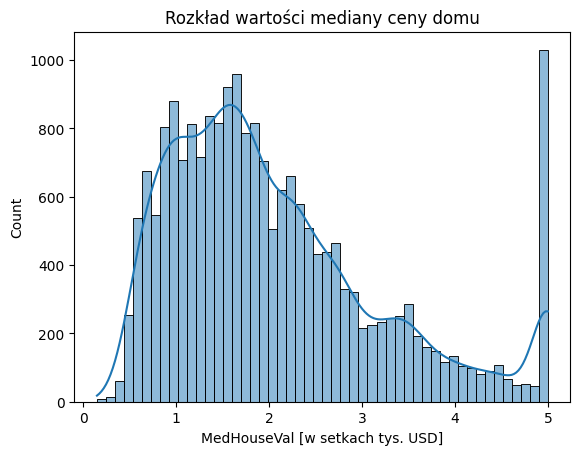

In [6]:
# Rozkład zmiennej celu
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title("Rozkład wartości mediany ceny domu")
plt.xlabel("MedHouseVal [w setkach tys. USD]")
plt.show()

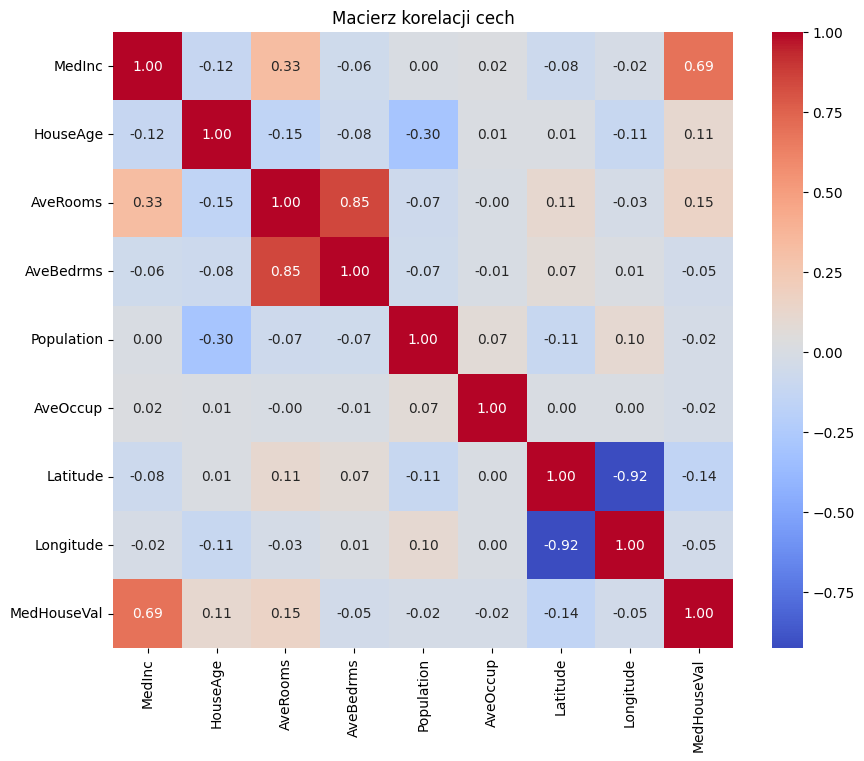

In [7]:
# Korelacje
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji cech")
plt.show()


In [8]:
# Definiujemy zmienną celu
target = 'MedHouseVal'

# Dzielimy dane na train/test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Train:", train_df.shape, "Test:", test_df.shape)

Train: (16512, 9) Test: (4128, 9)


In [ ]:
# Tworzymy obiekt AutoGluon
predictor = TabularPredictor(label=target, problem_type='regression', path='AutogluonModels/')

# Uruchamiamy automatyczny trening
# Włączenie GPU jest automatyczne (jeśli dostępny)
predictor.fit(
    train_data=train_df,
    time_limit=300,          
    presets='best_quality',  
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       5.95 GB / 15.84 GB (37.6%)
Disk Space Avail:   141.99 GB / 929.47 GB (15.3%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used

(_ray_fit pid=13108) [1000]	valid_set's rmse: 0.462075
(_ray_fit pid=19704) 
(_ray_fit pid=11452) [4000]	valid_set's rmse: 0.461937 [repeated 20x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=19344) [9000]	valid_set's rmse: 0.448202 [repeated 9x across cluster]


(_dystack pid=29396) 	-0.4662	 = Validation score   (-root_mean_squared_error)
(_dystack pid=29396) 	14.99s	 = Training   runtime
(_dystack pid=29396) 	7.91s	 = Validation runtime
(_dystack pid=29396) Fitting model: LightGBM_BAG_L1 ... Training model for up to 13.47s of the 35.45s of remaining time.
(_dystack pid=29396) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.20%)


(_ray_fit pid=26792) [1000]	valid_set's rmse: 0.471442
(_ray_fit pid=11904) [1000]	valid_set's rmse: 0.439501


(_dystack pid=29396) 	-0.4483	 = Validation score   (-root_mean_squared_error)
(_dystack pid=29396) 	6.73s	 = Training   runtime
(_dystack pid=29396) 	2.21s	 = Validation runtime
(_dystack pid=29396) Fitting model: WeightedEnsemble_L2 ... Training model for up to 65.91s of the 20.60s of remaining time.
(_dystack pid=29396) 	Ensemble Weights: {'LightGBM_BAG_L1': 0.75, 'LightGBMXT_BAG_L1': 0.25}
(_dystack pid=29396) 	-0.4461	 = Validation score   (-root_mean_squared_error)
(_dystack pid=29396) 	0.01s	 = Training   runtime
(_dystack pid=29396) 	0.0s	 = Validation runtime
(_dystack pid=29396) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=29396) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 20.57s of the 20.56s of remaining time.
(_dystack pid=29396) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.23%)
(_dystack pid=29396) 	-0.4528	 = Validation score   (-root_mean_squared_er

In [10]:
# Predykcje na zbiorze testowym
y_pred = predictor.predict(test_df)

# Metryki i porównanie modeli
performance = predictor.evaluate(test_df)
print("\nEwaluacja modeli:")
print(performance)

# Ranking wszystkich przetestowanych modeli
predictor.leaderboard(test_df, silent=False)


Ewaluacja modeli:
{'root_mean_squared_error': np.float64(-0.4224308429292921), 'mean_squared_error': -0.1784478170579523, 'mean_absolute_error': -0.2712429119894717, 'r2': 0.8638228064512335, 'pearsonr': 0.9295154697689388, 'median_absolute_error': -0.16944354629516606}
                     model  score_test  score_val              eval_metric  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   -0.422431  -0.432901  root_mean_squared_error        5.214983      16.975274  136.573978                 0.002000                0.001001           0.041997            3       True         11
1      WeightedEnsemble_L2   -0.424435  -0.434892  root_mean_squared_error        1.529121       3.488653   85.348393                 0.013001                0.001002           0.020974            2       True          6
2        LightGBMXT_BAG_L2   -0.425133  -0.439586  root_mean_squa

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-0.422431,-0.432901,root_mean_squared_error,5.214983,16.975274,136.573978,0.002000,0.001001,0.041997,3,True,11
1,WeightedEnsemble_L2,-0.424435,-0.434892,root_mean_squared_error,1.529121,3.488653,85.348393,0.013001,0.001002,0.020974,2,True,6
2,LightGBMXT_BAG_L2,-0.425133,-0.439586,root_mean_squared_error,5.011991,16.366931,108.022948,0.389034,0.339960,3.640202,2,True,7
3,CatBoost_BAG_L1,-0.425463,-0.436970,root_mean_squared_error,0.146532,0.172990,69.016225,0.146532,0.172990,69.016225,1,True,4
4,CatBoost_BAG_L2,-0.425664,-0.436141,root_mean_squared_error,4.652958,16.079491,109.045180,0.030001,0.052521,4.662433,2,True,10
5,LightGBM_BAG_L2,-0.425934,-0.436483,root_mean_squared_error,4.683476,16.126970,107.680702,0.060520,0.099999,3.297955,2,True,8
6,LightGBM_BAG_L1,-0.428141,-0.447671,root_mean_squared_error,0.889126,2.537004,5.875438,0.889126,2.537004,5.875438,1,True,2
7,RandomForestMSE_BAG_L2,-0.430319,-0.445786,root_mean_squared_error,5.122462,16.821753,128.571592,0.499505,0.794783,24.188846,2,True,9
8,LightGBMXT_BAG_L1,-0.458040,-0.467439,root_mean_squared_error,2.639355,11.878067,15.575926,2.639355,11.878067,15.575926,1,True,1
9,RandomForestMSE_BAG_L1,-0.501319,-0.501286,root_mean_squared_error,0.480462,0.777658,10.435757,0.480462,0.777658,10.435757,1,True,3


Computing feature importance via permutation shuffling for 8 features using 4128 rows with 5 shuffle sets...
	250.5s	= Expected runtime (50.1s per shuffle set)
2025-11-06 06:48:33,322	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-11-06 06:48:33,326	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-11-06 06:48:33,331	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	131.08s	= Actual runtime (Completed 5 of 5 shuffle sets)


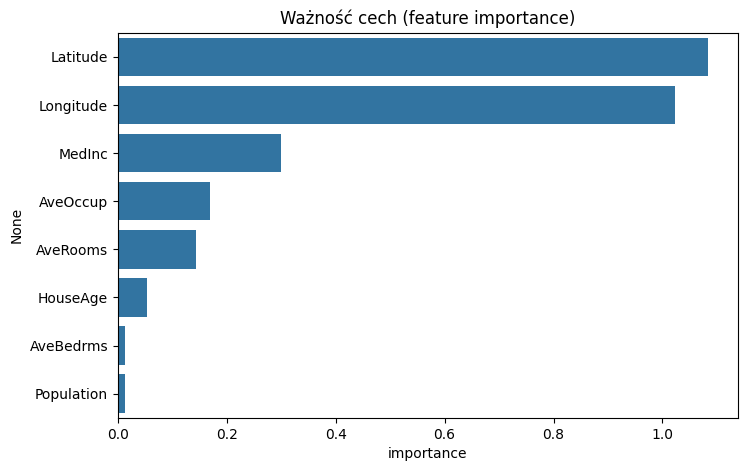

In [12]:
# Ważność cech
importances = predictor.feature_importance(test_df)
plt.figure(figsize=(8,5))
sns.barplot(x=importances['importance'], y=importances.index)
plt.title("Ważność cech (feature importance)")
plt.show()

In [15]:
sample = test_df.sample(5, random_state=1)
preds = predictor.predict(sample)
comparison = pd.DataFrame({
    "Prawdziwa_wartość": sample[target],
    "Prognoza": preds
})
print(comparison)


       Prawdziwa_wartość  Prognoza
4309             2.08800  2.111310
18478            3.35000  2.879311
4115             5.00001  4.553540
13552            0.64900  0.717224
18318            3.76600  3.438102
